# Geometric Brownian Motion

Recall from the chapter on Random Walks and Weiner processes that the continuous version of random walk with drift is given by the SDE

$$
dX = r dt+ \sigma dW_t
$$

and it is easy to verify that this integrates to $X(t) = \mathcal N(r t, \sigma \sqrt{t})$. Notice that the process is a Martingale if $r=0$. Something which we could have noticed even before integration by the requirement that Martingale processes have not drift term in the SDEs.

We now want to look at a different process

$$
dY = r Y dt + \sigma Y dW_t
$$

It is easy to verify using Ito's lemma that the solution is

$$
Y(t) = Y(0) e^{rt} e^{-\frac{1}{2} \sigma^2 t  + \sigma W_t}
$$

This is known as the lognormal distribution. More commonly the lognormal distribution is governed by two parameters $ \mu$ and $\sigma$ and has the PDF

$$
P(Y=y)dy = \frac{1}{\sqrt{2 \pi} \sigma y} e^{-\frac{ ( \log(y) - \mu)^2}{\sigma^2}}
$$

and while we are at it, it is instructive to note the mean evaluates to $e^{\mu + \sigma^2/2}$. To make connection with our work we have $\sigma^2 \to \sigma^2 t$ and $\mu \to (r - \frac{\sigma^2}{2})t$. Thus in our case the mean is

$$
\langle Y(t) \rangle = Y_0 e^{rt}
$$

Thus notice that the process is a Martingale if $r=0$. This is again consistent with Martingale processes having no drift term in their SDEs.

# The bank account with interest

In the Black Scholes world it is assumed that there is a bank account paying interest at no risk and that the rate of interest is constant. This is obviously a simplification and in the real world not only is the rate of interest not constant, it has a stochastic nature. However, for this chapter we will stick with the Black Scholes assumption. Thus the *SDE* for the money in the bank is

$$
dB=B r dt
$$

with no drift term. This simply integrates to $B(t)= B_0 e^{rt}$.

# The stock

In the Black Scholes world the Stock price is assumed to move according to the lognormal distribution. The drift $\mu$ and volatility $\sigma$ are assumed to be independent of time. For generalization to non-stochastic functions of time see Mark Joshi's book for example.

$$
dS= S \mu dt + S \sigma dW_t
$$

One motivation for this can be the assumption that the *interest rate for stocks* i.e. $\frac{S_{t+\Delta t} - S_t}{S_t}$ undergoes a Brownian motion (instead of the stock itself). While this may seem like a good theoretical input given that Stock prices never go negative, in effect  the assumption breaks down much before that as Stock price movements far in the tails is verifiably described neither by Brownian motion nor by Geometric Brownian motion (see Bouchaud and Potters or Voit for details). Nevertheless, we will play with this toymodel which seems to have some relevancy to the real world, however limited it may be.

# Simulations

In the most simple Black Scholes model, these are the only two fundamental assets. We will first look at some simulations of these before moving to derivatives. Below we plot the trajectory of Brownian and Geometric Brownian motion **using the same random numbers** for comparison. We also plot the trajectory of the risk free bank account such that it provides the same **expected** returns as the stock i.e. has

$$
\mu = r
$$

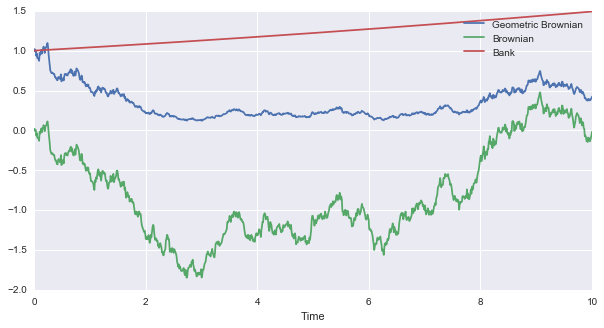

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
%matplotlib inline

from MonteCarloPaths import Paths, WeinerPaths


    
class GeometricWeinerPaths(Paths):
    
    
    def __init__(self,T,nsteps,npaths,S0=1,mu=0,sigma=1,seed=False):
        super(GeometricWeinerPaths,self).__init__(T,npaths)
        
        self.nsteps=nsteps
        self.dt=1.0*self.T/self.nsteps
        Paths.__setup__(self)
        
        self.mu=mu
        self.sigma=sigma
        
        self.dW=np.sqrt(self.dt)
        if type(seed) != bool:
            np.random.seed(seed)
        self.randoms=np.random.normal(0,1,npaths*(nsteps-1))
        self.randoms.shape=[npaths,nsteps-1]

            
        self.paths[:,0]=S0
        

        for i in range(nsteps-1):
            self.paths[:,i+1]=self.paths[:,i]*(1+self.mu*self.dt+self.sigma*self.dW*self.randoms[:,i])
        


num_steps_weiner=1000
sigma=1
mu=.1

# generate one path with time interval 10 devided into 10000 steps

### Compare Brownian to Geometric Brownian **using same random steps ** ###
### Compare Geometric Brownian to Bank using same *average* growth rate



# we use the same random number seed for the brownian and geometric brownian motion to be able to compare

time_line=w.get_timeline()
path_geometric_weiner=gw[0]



figsize(10, 5)



sigma=.4
r=.04
mu=r

gw=GeometricWeinerPaths(10,num_steps_weiner,1,mu=mu,sigma=sigma,seed=12)
bank=GeometricWeinerPaths(10,num_steps_weiner,1,mu=r,sigma=0,seed=12)
w=WeinerPaths(10,num_steps_weiner,1,mu=mu,sigma=sigma,seed=12)


path_geometric_weiner=gw[0]
path_weiner=w[0]
path_bank=bank[0]


plt.plot(time_line,path_geometric_weiner,label="Geometric Brownian")
plt.plot(time_line,path_weiner,label="Brownian")
plt.plot(time_line,path_bank,label="Bank")
plt.xlabel("Time")
plt.legend()



We now plot several realizations of the stock movement along with the bank account movement always constrained to have the same average returns.

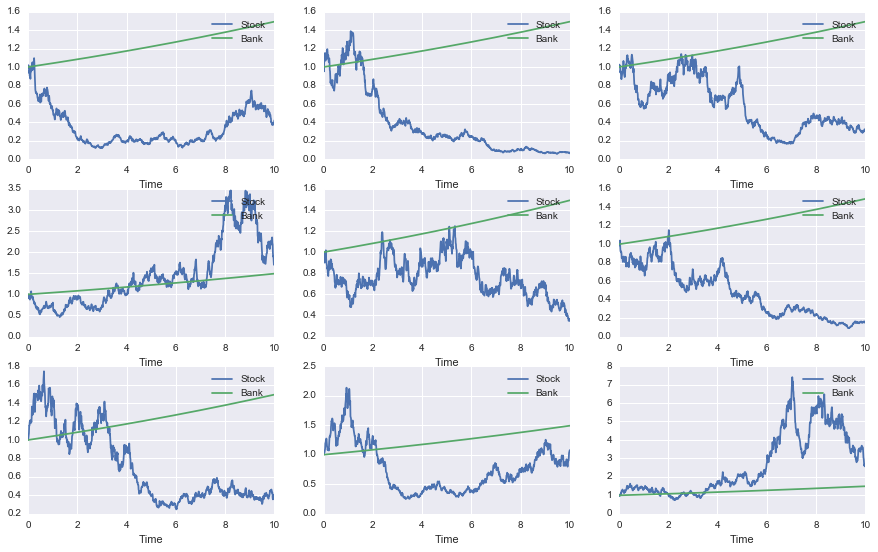

In [25]:
figsize(15,9)
number_columns=3
number_rows=3

sigma=.4
r=.04
mu=r

gw=GeometricWeinerPaths(10,num_steps_weiner,9,mu=mu,sigma=sigma,seed=12)
bank=GeometricWeinerPaths(10,num_steps_weiner,9,mu=r,sigma=0,seed=12)
t_paths=gw.get_timeline()

for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(t_paths,gw[i],label="Stock")
    plt.plot(t_paths,bank[i],label="Bank")
    plt.xlabel("Time")
    plt.legend()



# Derivatives

If bank accounts and stocks can be seen as fundamental entities we can also have derivatives whose movements depend on the movement of these fundamental entities. The simples of these are European options. The call option has a payoff of $max(S_T - K,0)$ at time $T$ while the put option has a payoff of $max(K-S_T,0)$ at time $T$. These cannot be excercised at any other time. The motivation for this simple payoff is for example if one wants to buy a stock at price $K$ at time $T$ if the stock is costlier than $K$ one can buy the European call option as an insurance. Likewise for selling the stock at $K$ if it gets cheaper than that at time $T$.

Now the question is can we price the option at time $t=0$ given its value at time $t=T$ to be that found above? To answer that lets step back and see if we can price a dice that pays its face value. By no arbitrage the price is $3.5$ since we expect to get $(1,2,3,4,5,6)$ with equal probability. 

Is the stock itself priced in the above fashion? Using the lognormal distribution resulting from geometric Brownian motion we see that

$$
\langle S_T \rangle = S_0 e^{\mu T} \ne S_0
$$

However that by itself is not a problem as we do not expect the stock price at a later time to be the same as at $t=0$ because even the bank account increases exponentially

$$
\langle B_T \rangle = B_T= B_0 e^{r T} \ne B_0
$$

so we should really be measuring the wealth in terms of the bank account (and therefore be using the bank account as a **numeraire**). To make contact with the dice example think *buying* the game now but getting to play it an year later in the presence of an interest paying account. The game better pay enough to dissuade one form not playing and instead putting the money in the bank. 

However, we see that

$$
\langle \frac{S_T}{B_T} \rangle = \frac{S_0}{B_0} e^{(\mu-r) T} \ne \frac{S_0}{B_0}
$$
unless $\mu=r$. So what is happening? Why is the stock not priced according to the dice game we discussed above? The reason for this is the above dice game is not very attractive as an investement strategy (while worse games survive in casinos for the *fun* element) as the investor gains nothing on average and may end up loosing. So the investor would ask for a risk premium and in reality the dice game would be priced lower (as in the investor would pay something less than $3.5)

However, this does not stop us from pricing derivatives as long as we use a measure under which the stock movement is a Martingale (even though it isn't under the real world probability measures). There are excellent technical descriptions of change of measure that are out there but the goal of this lecture is to explain risk-neutrality in a simple way and so I will leave the discussion at this level and show how it works in practice.

We want a measure under which the stock price measured in units of the bank account is a Martingale. In other words we want to get rid of the drift term for $d\frac{S}{B}$. Recalling Ito's rule

$$
df(S,B) = f_S dS+ f_B dB + f_{SB} dSdB + \frac{1}{2} f_{SS} dS^2 + \frac{1}{2} f_{BB} dB^2
$$

and that we have $dW_t dW_t = dt$ and ignoring terms higher than $dt$, under the real world probabilities we get

$$
\begin{eqnarray}
d\frac{S}{B} = \frac{S}{B} (\mu -r) dt +  \frac{S}{B} \sigma dW_t
\end{eqnarray}
$$

Thus in order to remove the drift we define a new measure $\tilde W_t = W_t + \frac{\mu-r}{\sigma}$ to get

$$
d\frac{S}{B} = \frac{S}{B} \sigma d\tilde W_t
$$

The point is that we can now price a derivative $f(S_t)$ as

$$
\frac{f(S_0)}{B_0} = E_{\tilde W} [ \frac{f(S_T)}{B_T} ]
$$

Under **this** risk neutral measure the stock price movement is governed by

$$
dS = S r dt + S \sigma d \tilde W_t
$$
and thus the expectation above will be calculated with a lognormal distribution with parameters $(r-\frac{1}{2} \sigma^2)T$ and $\sigma^2 T$.

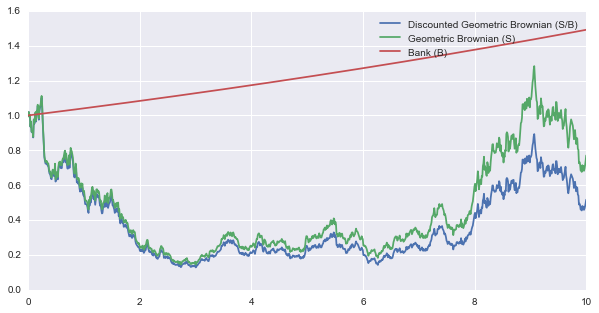

In [37]:
sigma=.4
r=.04
mu=.1

gw=GeometricWeinerPaths(10,num_steps_weiner,1,mu=mu,sigma=sigma,seed=12)
bank=GeometricWeinerPaths(10,num_steps_weiner,1,mu=r,sigma=0,seed=12)


path_geometric_weiner=gw[0]
path_bank=bank[0]

plt.plot(time_line,path_geometric_weiner/path_bank,label="Discounted Geometric Brownian (S/B)")
plt.plot(time_line,path_geometric_weiner,label="Geometric Brownian (S)")
plt.plot(time_line,path_bank,label="Bank (B)")
plt.legend()




Similarly we can use the stock as a numeraire and demand $\frac{B}{S}$ is driftless. It will become clear soon why we are discussing another numeraire. We have using Ito's rule

$$
\begin{eqnarray}
d\frac{B}{S} &=& \frac{dB}{S} - \frac{B}{S^2} dS + \frac{1}{2} \frac{2B dS^2}{S^3} \\
&=& (r+ \sigma^2 - \mu) \frac{B}{S} dt - \sigma \frac{B}{S} dW_t
\end{eqnarray}
$$

and we can make this driftless under the new measure $\hat W_t = W_t + \frac{ \mu - (r+\sigma^2)}{\sigma} t$. The stock moves under this measure as 

$$
dS = S (r+\sigma^2 ) dt + S \sigma d \hat W_t
$$

and thus the expectation above will be calculated with a lognormal distribution with parameters $(r+\frac{1}{2} \sigma^2) T$ and $\sigma^2 T$.

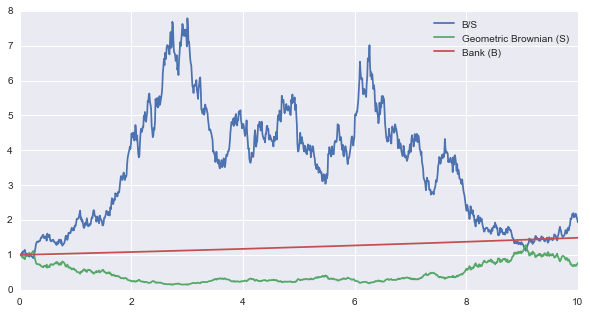

In [40]:
plt.plot(time_line,path_bank/path_geometric_weiner,label="B/S")
plt.plot(time_line,path_geometric_weiner,label="Geometric Brownian (S)")
plt.plot(time_line,path_bank,label="Bank (B)")
plt.legend()

## Evaluating the call option price

Now we are in a position to evaluate the call option price. The price at $T$ is $(S_T-K)_+$. We can view this as two payments (a) $P_1$ that pays $S_T$ when $S_T>K$ and (b) $P_2$ that pays $-K$ when $S_T>K$. To evaluate the first payments price we use the second numeraire

$$
\begin{eqnarray}
\frac{P_1(t=0)}{S_0} &=& E_{\hat W} \left[ \frac{S_T}{S_T} \mathbb 1_{S_T > K} \right] \\
&=& E_{\hat W} \left[\mathbb 1_{S_T > K} \right] \\
&=& P(S_0 e^{(r+\frac{1}{2}\sigma^2)T + \sigma \hat W_T} > K) \\
&=& P ( \hat W_T  > -\frac{ \log (S_0/K) + (r+ \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} ) \\`
&=& \mathcal N(\frac{ \log (S_0/K) + (r+ \frac{\sigma^2}{2})T}{\sigma \sqrt{T}})
\end{eqnarray}
$$

And to evaluate the second price we use the first numeraire
$$
\begin{eqnarray}
\frac{P_2(t=0)}{B_0} &=& -E_{\tilde W} \left[ \frac{K}{B_T} \mathbb 1_{S_T > K} \right] \\
&=& -K e^{-rT} E_{\tilde W} \left[\mathbb 1_{S_T > K} \right] \\
&=& -K e^{-rT} P(S_0 e^{(r-\frac{1}{2}\sigma^2)T + \sigma \tilde W_T} > K) \\
&=& -K e^{-rT} P ( \tilde W_T  > -\frac{ \log (S_0/K) + (r- \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} ) \\`
&=& -K e^{-rT} \mathcal N(\frac{ \log (S_0/K) + (r- \frac{\sigma^2}{2})T}{\sigma \sqrt{T}})
\end{eqnarray}
$$

and thus we get the price of the option at time $t=0$ as 
$$
\begin{eqnarray}
C(0) &=& P_1(0) + P_2(0) \\
&=& S_0 \mathcal N(\frac{ \log (S_0/K) + (r+ \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}) - K e^{-rT} \mathcal N(\frac{ \log (S_0/K) + (r- \frac{\sigma^2}{2})T}{\sigma \sqrt{T}})
\end{eqnarray}
$$




